<a href="https://colab.research.google.com/github/SolomonAyuba/machine-learning/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 1: Supervised Learning (09.06.25)
  ### Data Preprocessing Techniques

  1. ### Rescaling Data (Normalisation)

  Rescaling is essential when features have different ranges. For instance, if one
  variable ranges from 0 to 1000, while another is between 0 and 1, models that
  depend on distance calculations, such as k-Nearest Neighbours (KNN) and Support Vector Machines (SVMs), may become biased.
  - Min-Max Scaling: Converts features to a scale between 0 and 1.
  - Formular: _X' = X - X_min ÷ X_max - X_min_

  Example using Scikit-Learn

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

data = np.array([[200], [400], [600], [800], [1000]])
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
print(scaled_data)

[[0.  ]
 [0.25]
 [0.5 ]
 [0.75]
 [1.  ]]


2. ### Standardisation (Z-Score scaling)

  Standardisation transforms data so that it has a mean of 0 and a standard
  deviation of 1. This technique is crucial for models such as logistic regression and linear regression, which assume normally distributed data.
  - Z-Score Formula: _X' = X - μ ÷ σ_
  - where μ is the mean and σ is the standard deviation.
  
  Example using Scikit-Learn

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

data = np.array([[50], [100], [150], [200], [250]])
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data)
print(standardized_data)

[[-1.41421356]
 [-0.70710678]
 [ 0.        ]
 [ 0.70710678]
 [ 1.41421356]]


3. ### Binarisation
  Binarisation transforms data into binary values, often required for algorithms
  like Bernoulli Naive Bayes.

  Example using Scikit-Learn

In [ ]:
from sklearn.preprocessing import Binarizer

data = np.array([[1.5], [0.3], [2.8], [0.5]])
binarizer = Binarizer(threshold=1.0)
binary_data = binarizer.fit_transform(data)
print(binary_data)

[[1.]
 [0.]
 [1.]
 [0.]]


## Feature Selection in Machine Learning
Feature selection aims to identify the most relevant variables for model training, eliminating redundant or irrelevant ones.

## Methods of feature selection
**📌 Univariate selection:** Uses statistical tests to evaluate feature
importance.

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
best_features = SelectKBest(score_func=f_classif, k=2)
X_new = best_features.fit_transform(X, y)
print(X_new.shape)

(150, 2)


**📌 Principal Component Analysis (PCA):** Reduces dimensionality while
preserving variance.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print(X_pca.shape)

(150, 2)


# Training and Testing in Machine Learning
The goal of a machine learning model is to learn patterns from data and generalise to new, unseen inputs. This requires a structured approach to model evaluation.

##Why do we need separate training and testing sets?
- **To avoid overfitting:** If a model is tested on the same data it was trained on, it may simply memorise patterns instead of generalising.
- **To measure real-world performance:** A model should be evaluated on unseen data to understand how it will behave in practical applications.
- **To compare models effectively:** Different models can be assessed fairly by using the same test dataset for evaluation.

## Splitting Data for Training and Testing
### Holdout method
The simplest technique is to split the dataset into two parts:
1. Training set: Used to train the model.
2. Testing set: Used to evaluate performance.

🔹 Common split ratios:
- 80% training / 20% testing
- 70% training / 30% testing
- 67% training / 33% testing (used in small datasets)

**Advantage:** Simple and fast.
**Disadvantage:** Results can vary significantly depending on the split.

Example using Scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

# Load dataset
X, y = load_iris(return_X_y=True)

# Split Dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# EValuate model
accuracy = model.score(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 1.00


##Splitting Data for Training and Testing
###k-Fold Cross-Validation
Instead of using a single train-test split, k-fold cross-validation divides the
dataset into k equal parts (folds). The model is trained on k-1 folds and tested
on the remaining fold. This process is repeated k times, with each fold used as
a test set once.

####Common k values:
- k = 5 (Standard for most datasets)
- k = 10 (Used when more training data is required)
- Leave-One-Out Cross-Validation (LOOCV) (Extreme case where k =
number of instances)

**Advantage:** More reliable than a single train-test split.
**Disadvantage:** It is computationally expensive.

Example:

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Perform 5-fold cross-validation
scores= cross_val_score(model, X, y, cv=5)
print(f"Cross-validation Accuracy: {scores.mean():.2f}")


Cross-validation Accuracy: 0.97


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Week 2 - Unsupervised Learning (10.06.25)

### K-Means Clustering (Worksheet - Programming and Analytical Task)

1. **(Programming task):**
Write a Python program to implement K-Means clustering on the following dataset
using Scikit-learn. Use k=3 and print the cluster labels assigned to each data point.
Complete the program by fitting the K-Means model and printing the labels assigned to each point

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Sample dataset
X = np.array([
    [5.1, 3.5], [4.9, 3.0], [6.2, 2.8], [5.8, 2.7],
    [7.0, 3.2], [6.4, 3.2], [5.0, 3.6], [5.5, 2.3],
    [6.7, 3.0], [7.2, 3.6]
])

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Print assigned labels
print("Cluster Labels:", kmeans.labels_)

Cluster Labels: [2 2 0 0 1 1 2 0 1 1]


2. **(Analytical Task - Elbow M\method):**
Using the dataset from question 1, explain how you would use the Elbow Method to determine the optimal number of clusters (k). If given access to computational tools, write Python code to plot the elbow graph.

ValueError: x and y must have same first dimension, but have shapes (9,) and (1,)

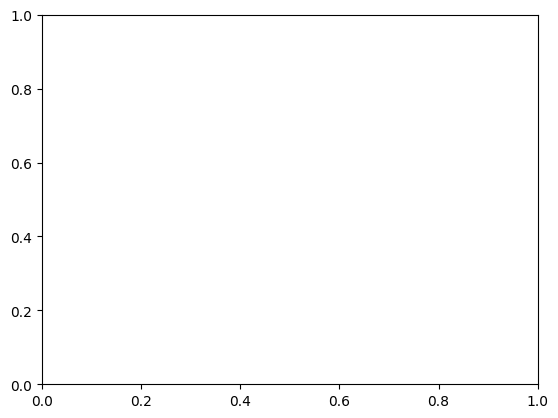

In [ ]:
inertia_values = []
k_values = range(1, 10)

for k in k_values:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X)
  inertia_values.append(kmeans.inertia_)

  # Plot the Elbow Method
  plt.plot(k_values, inertia_values, marker='o')
  plt.xlabel('Number of Clusters (k)')
  plt.ylabel('Inertia')
  plt.title('Elbow Method for Optimal K')
  plt.show()

3. *(Programming Task - Evaluating clustering performance):*
Modify your code from question 1 to compute the inertia (sum of squared distances to the nearest centroid) and the Silhouette Score for the clustering result.
**Use the following libraries:**
_from sklearn.metrics import silhouette_score_

_Write a function to calculate both metrics and print them._

In [ ]:
from sklearn.metrics import silhouette_score

# Compute Inertia
inertia = kmeans.inertia_

# Compute silhouette score
silhouette = silhouette_score(X, kmeans.labels_)

print(f"Inertia: {inertia}")
print(f"Silhouette Score: {silhouette:.3f}")

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

# Week 3 - Decision Trees and Linear Regression (OLS) (10.06.25)

## Implementing Linear Regression in Python
Python Implementation using Scikit-Learn

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1) # 100 data points
y = 4 + 3 * X + np.random.randn(100, 1) # Linear relations with noise

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Plot results
plt.scatter(X_test, y_test, color="blue", label="Actual")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Predicted")
plt.xlabel("Input Feature (X)")
plt.ylabel("Output (Y)")
plt.title("Linear Regression Model")
plt.legend()
plt.show()

# Print coefficients
print(f"Intercepts: {model.intercept_[0]:.2f}, Slope:{model.coef_[0][0]:.2f}")

### Key takeaways from the implementation:
- The LinearRegression class in Scikit-Learn trains the model using Least
Squares Regression.
- The intercept and slope determine the best-fit line.
- The test data predictions help assess model performance.

## Evaluatin the Performance of a Linear Regression Model
Python impolementation of model evaluation


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predictions
y_pred = model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Absolute Error: 0.59
Mean Squared Error: 0.65
R-squared: 0.81


###Key Insight:
- A lower MAE/MSE indicates better accuracy.
- A higher R2 means the model explains more variance in the data.

# Week 4: Regularisation, Linear Classifiers, and Logistic Regression (Wed 11 June 2025)

## Understanding Overfitting and the Need for Regularisation

**Example of overfitting in linear regression**

If we fit a high-degree polynomial to a small dataset, the model may perfectly
fit training points but fail on new data:

**Python Implementation:**

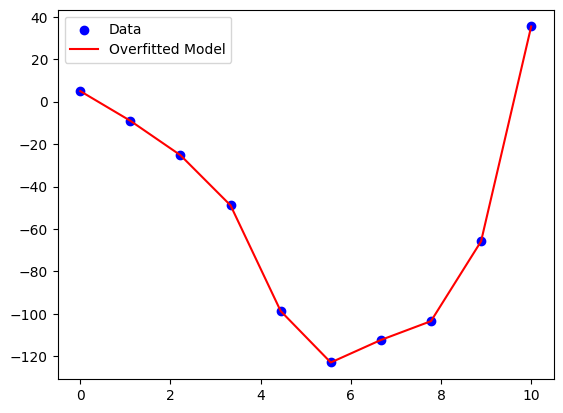

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generate sample data
np.random.seed(42)
X = np.linspace(0, 10, 10).reshape(-1, 1)
y = X**3 - 10*X**2 + 3*X + np.random.randn(10, 1) * 10  #Cubic relationship with noise

# Fit a high-degree polynomial
poly = PolynomialFeatures(degree=8)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)

# Plot results
plt.scatter(X, y, color="blue", label="Data")
plt.plot (X, model.predict(X_poly), color="red", label="Overfitted Model")
plt.legend()
plt.show()

Implementation output:
 - **Problem:** The model follows noise instead of the true pattern.
 -  **Solution:** Apply L1 or L2 regularisation to control complexity.


## Implementing L1 and L2 Regularisation in Python
**Lasso Regression (L1 Regularisation)**

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

# Generate sample data
X, y = make_regression(n_samples=100, n_features=5, noise=10, random_state=42)

#Split into traning and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Print coefficients
print(f"Lasso Coefficients: {lasso.coef_}")

Lasso Coefficients: [61.43821843 98.34755587 60.9358236  55.43964642 35.89008021]


Effect: Some coefficients are set to zero, removing unimportant features.

**Ridge Regression (L2 Regularisation)**

In [ ]:
from sklearn.linear_model import Ridge

# Apply Ridge Regression
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

# Print coefficients
print(f"Ridge Coefficients: {ridge.coef_}")

Ridge Coefficients: [61.44968224 98.32085667 60.97256679 55.4690014  35.94653687]


Effect: All coefficients are reduced, but none are eliminated.


## Implementing Logistic Regression in Python
**Libraries needed:**
- scikit-learn for model implementation
- matplotlib for visualisation

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
print("Accuracy:", model.score(X_test, y_test))

Accuracy: 0.9555555555555556


**Regularisation Example:** L2 (Ridge)
Objective: Add a penalty to the cost function to control the size of the coefficients.

Example:


# C is the inverse of regularisation strength
model = LogisticRegression(C=1, penalty='l2')
model.fit(X_train, y_train)

# Week 6 - Theory: Margins, Hyperplanes, and Kernels (17.06.2025)

### SVM classification in Python

Libraries needed:
- scikit-learn for model implementation
- matplotlib for visualisation

In [ ]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3)
model = SVC(kernel='linear')
model.fit(X_train, y_train)
print("Accuracy:", model.score(X_test, y_test))

Accuracy: 0.9777777777777777


# Linear SVM

**Implementation of Linear SVM in Python**

Let’s explore how to implement a Linear SVM using the scikit-learn library.

Importing required libraries:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load dataset
iris = datasets.load_iris()
X = iris.data[:, :2] # Taking only two features for easy visualization
y = (iris.target != 0) * 1 # Converting to Binary classification

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear SVM
svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train, y_train)

# Predict and evaluate
y_pred = svm.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Accuracy: 1.00


#### Enhancing Linear SVMs

In [ ]:
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
print(f"Accuracy (RBF Kernel): {accuracy_score(y_test, y_pred_rbf):.2f}")

Accuracy (RBF Kernel): 1.00


## Non Linear SVMs

**Why Do We Need Non-Linear SVMs?**

Linear SVMs are effective when datasets are linearly separable, meaning that a straight hyperplane can cleanly separate different
classes. However, in many real-world problems, data points are intermixed in complex ways, making it impossible to draw a single linear boundary.

**Consider the following case:**

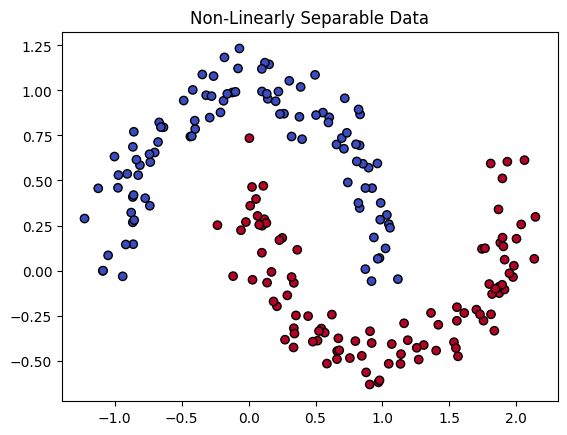

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# Generate dataset
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

# Plot dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.title('Non-Linearly Separable Data')
plt.show()

The make_moons dataset above produces two interleaved crescent-shaped clusters that cannot be separated using a straight
line. A Non-Linear SVM with kernels helps by transforming the input space into a higher-dimensional space where a linear hyperplane can effectively separate the classes.

### Implementing Non-Linear SVMs in Python

We will train an SVM classifier using different kernel functions and compare
their performance.

**Step 1: Import required libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Generate non-linear dataset
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

# Split data into traning and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=42)

**Step 2: Train an SVM with different kernels**

In [ ]:
# Train SVM with RBF Kernel
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

# Train SVM with Polynomial Kernal
svm_poly = SVC(kernel='poly', degree=3, C=1.0)
svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)

# Print Accuracy
print(f"RBF Kernel Accuracy: {accuracy_score(y_test, y_pred_rbf):.2f}")
print(f"Polynomial Kernel Accuracy: {accuracy_score(y_test, y_pred_poly):.2f}")

RBF Kernel Accuracy: 0.97
Polynomial Kernel Accuracy: 0.93


# Week 7: Feature Selection and Latent Factor Models (PCA) (Wed 18 June 2025)

### Key Feature Selection Techniques

- Univariate selection.
- Recursive Feature Elimination (RFE).
- Principal Component Analysis (PCA).
- Feature importance (using models like Random
Forest).

**Example of Univariate Selection**

In univariate selection, Chi-squared Test (chi2) is used for selecting the most relevant features for classification tasks.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X_new = SelectKBest(chi2,k=4).fit_transform(X,y)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=4 is greater than n_features=2. All the features will be returned.
  warnings.warn(


ValueError: Input X must be non-negative.

**Example of Recursive Feature
Elimination**

In the code example below, RFE uses a logistic
regression model to select the top 3 features from
the Pima dataset.

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
rfe = RFE(model, 3)
X_rfe = rfe.fit_transform(X,y)

TypeError: RFE.__init__() takes 2 positional arguments but 3 were given

### Example of PCA

In this code snippet below, PCA selects 3 principal components from the Pima Indians diabetes dataset.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

ValueError: n_components=3 must be between 0 and min(n_samples, n_features)=2 with svd_solver='covariance_eigh'

###Example of Feature Importance with Extra Trees

Extratreesclassifier is an ensemble method based on decision trees that helps estimate feature importance. Each tree contributes to a ranking of features, enabling the identification of the most impactful predictors.

For example using the Pima Indians diabetes dataset, we estimate feature
importance and rank the features.

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
importance = model.feature_importances_
print("Feature Importances:", importance)

Feature Importances: [0.44792582 0.55207418]


# Week 8 – Clustering: K-means and Soft K-means (Wed 18 June, 2025)

### Implementing Soft K-Means in Python

We can implement Soft K-Means (Fuzzy C-Means) using the skfuzzy library.

**Example: Soft k-means clustering on sample data**

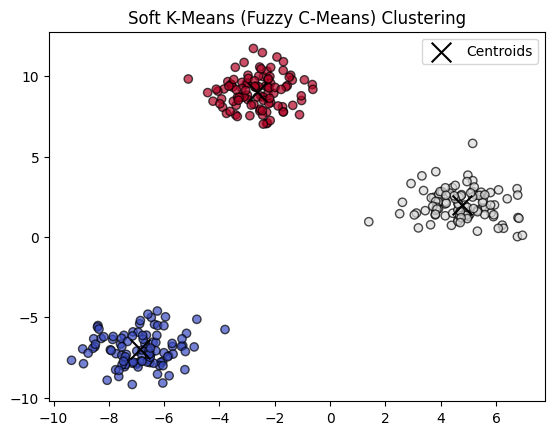

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from sklearn.datasets import make_blobs

# Generate synthetic dataset
X, _ = make_blobs(n_samples=300, centers=3, random_state=42)

# Apply Fuzzy C-Means clustering
cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(X.T, c=3, m=2, error=0.005, maxiter = 1000)

# Assign each data point to the most probable cluster
cluster_membership = np.argmax(u, axis=0)

# Plot results
plt.scatter(X[:, 0], X[:, 1], c=cluster_membership, cmap='coolwarm', edgecolors='k', alpha=0.7)
plt.scatter(cntr[:, 0], cntr[:, 1], c='black', marker='x', s=200, label='Centroids')
plt.title('Soft K-Means (Fuzzy C-Means) Clustering')
plt.legend()
plt.show()

# Week 10: Probabilistic Methods and Bayesian View

Code Snippet for Implementing Bayes' Theorem in Python

In [ ]:
def bayes_theorem(prior,likelihood, evidence):
  return(likelihood*prior)/evidence

  prior = 0.01
  likelihood = 0.99
  evidence = (0.99 * 0.01) + (0.05 * 0.99)
  posterior = bayes_theorem(prior, likelihood, evidence)
  print(f"Posterior Probability: {posterior}")

### PyMC3 for Bayesian Inference

In [ ]:
import pymc3 as pm

with pm.Mode() as model:
  prior = pm.Normal('prior', mu=0, sigma=1)
  likelihood = pm.Norma('likelihood', mu=prior, sigma=1, observed=data)
  posterior = pm.sample(1000)
pm.plot_posterior(posterior)

PyMC3 is a Python library for probabilistic
programming. In the snippet above, the prior and likelihood distributions are specified, and the posterior distribution is inferred.

- The `pm.sample` function draws samples from the posterior distribution using MCMC techniques.
- The `pm.plot_posterior` function visualises the posterior distribution, providing insights into the uncertainty of the estimated parameter.